# **import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/total-population-by-country-2025.csv')

In [3]:
df.head()

,pop2025,pop2050,country,area,landAreaKm,cca2,cca3,density,growthRate,worldPercentage,rank
0,1463870000,1679590000,India,3287590.0,2973190.0,IN,IND,492.3567,0.0089,0.1829,1
1,1416100000,1260290000,China,9706961.0,9424702.9,CN,CHN,150.2541,-0.0023,0.1769,2
2,347276000,380847000,United States,9372610.0,9147420.0,US,USA,37.9644,0.0054,0.0434,3
3,285721000,320713000,Indonesia,1904569.0,1877519.0,ID,IDN,152.1801,0.0079,0.0357,4
4,255220000,371864000,Pakistan,881912.0,770880.0,PK,PAK,331.0762,0.0157,0.0319,5


# **cleaning**

In [4]:
df.shape

(234, 11)

In [5]:
df.describe()

,pop2025,pop2050,area,landAreaKm,density,growthRate,worldPercentage,rank
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000,234.000000
mean,3.517056e+07,4.129358e+07,5.814500e+05,5.571123e+05,463.591397,0.008594,0.004393,117.500000
std,1.389109e+08,1.466625e+08,1.761841e+06,1.689972e+06,2050.851624,0.013114,0.017355,67.694165
min,5.010000e+02,7.140000e+02,4.400000e-01,4.400000e-01,0.135800,-0.045500,0.000000,1.000000
25%,4.337755e+05,5.335682e+05,2.650000e+03,2.625875e+03,40.410750,-0.000375,0.000100,59.250000
50%,5.677270e+06,6.246300e+06,8.119950e+04,7.568925e+04,101.003100,0.008100,0.000700,117.500000
75%,2.386332e+07,3.273732e+07,4.304258e+05,4.047876e+05,260.799775,0.018400,0.002975,175.750000
max,1.463870e+09,1.679590e+09,1.709824e+07,1.637687e+07,21945.501500,0.040700,0.182900,234.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pop2025          234 non-null    int64  
 1   pop2050          234 non-null    int64  
 2   country          234 non-null    object 
 3   area             234 non-null    float64
 4   landAreaKm       234 non-null    float64
 5   cca2             233 non-null    object 
 6   cca3             234 non-null    object 
 7   density          234 non-null    float64
 8   growthRate       234 non-null    float64
 9   worldPercentage  234 non-null    float64
 10  rank             234 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 20.2+ KB


In [7]:
df.isna().sum()

,0
pop2025,0
pop2050,0
country,0
area,0
landAreaKm,0
cca2,1
cca3,0
density,0
growthRate,0
worldPercentage,0


In [9]:
df[df['cca2'].isnull()]

,pop2025,pop2050,country,area,landAreaKm,cca2,cca3,density,growthRate,worldPercentage,rank
137,3092820,4512300,Namibia,825615.0,823290.0,NaN,NAM,3.7567,0.0207,0.0004,138


In [10]:
df.loc[df['country'] == 'Namibia', 'cca2'] = 'NA'

In [11]:
df.isna().sum()

,0
pop2025,0
pop2050,0
country,0
area,0
landAreaKm,0
cca2,0
cca3,0
density,0
growthRate,0
worldPercentage,0


In [8]:
df[df['growthRate'] < 0]

,pop2025,pop2050,country,area,landAreaKm,cca2,cca3,density,growthRate,worldPercentage,rank
1,1416100000,1260290000,China,9706961.0,9424702.9,CN,CHN,150.2541,-0.0023,0.1769,2
8,143997000,136133000,Russia,17098242.0,16376870.0,RU,RUS,8.7927,-0.0057,0.0180,9
11,123103000,105123000,Japan,377930.0,364500.0,JP,JPN,337.7311,-0.0053,0.0154,12
18,84075100,78294600,Germany,357114.0,349390.0,DE,DEU,240.6340,-0.0056,0.0105,19
19,71619900,66382700,Thailand,513120.0,510890.0,TH,THA,140.1865,-0.0007,0.0089,20
...,...,...,...,...,...,...,...,...,...,...,...
226,11194,10148,Wallis and Futuna,274.0,274.0,WF,WLF,40.8540,-0.0074,0.0000,227
227,9492,9781,Tuvalu,26.0,30.0,TV,TUV,316.4000,-0.0160,0.0000,228
228,5574,4258,Saint Pierre and Miquelon,242.0,242.0,PM,SPM,23.0331,-0.0096,0.0000,229
229,4359,3692,Montserrat,102.0,102.0,MS,MSR,42.7353,-0.0068,0.0000,230


# **EDA**

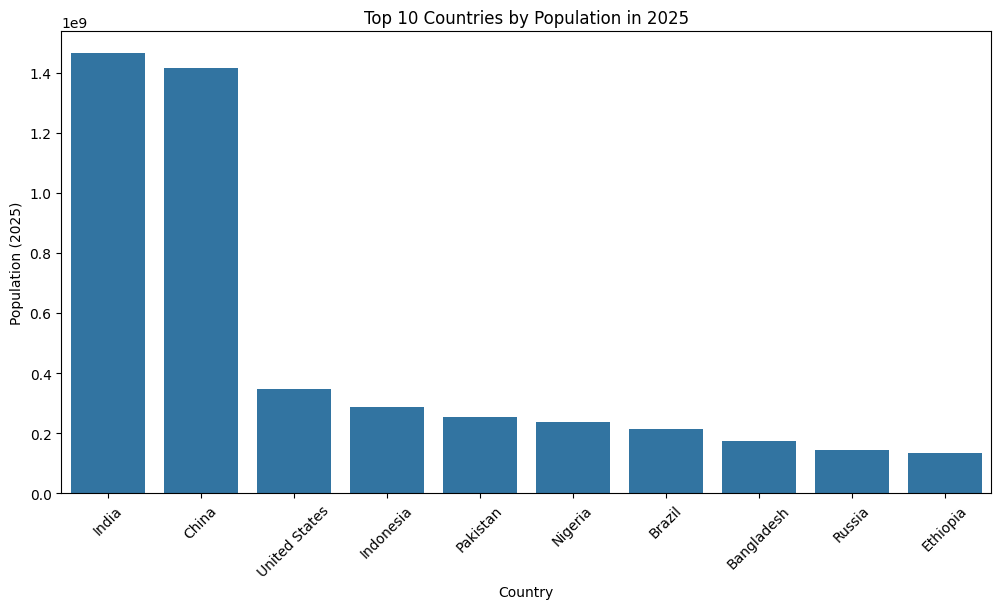

In [15]:
top_10_pop = df.sort_values('pop2025', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='country', y='pop2025', data=top_10_pop)
plt.title('Top 10 Countries by Population in 2025')
plt.xticks(rotation=45)
plt.ylabel('Population (2025)')
plt.xlabel('Country')
plt.show()

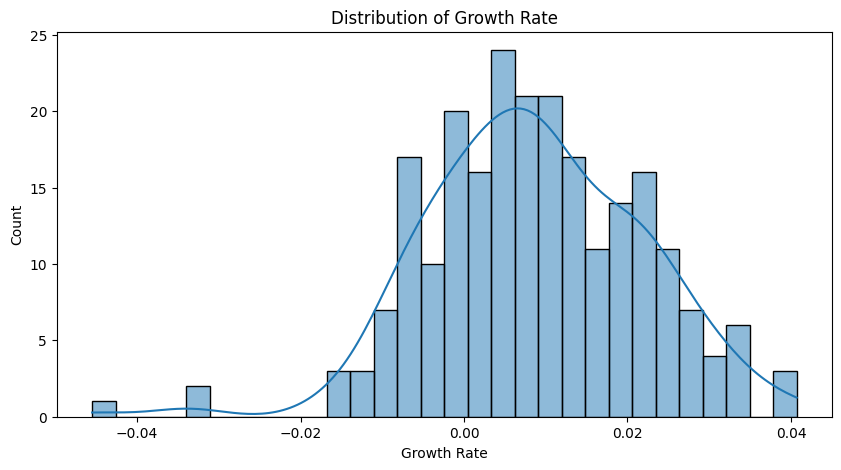

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['growthRate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Count')
plt.show()

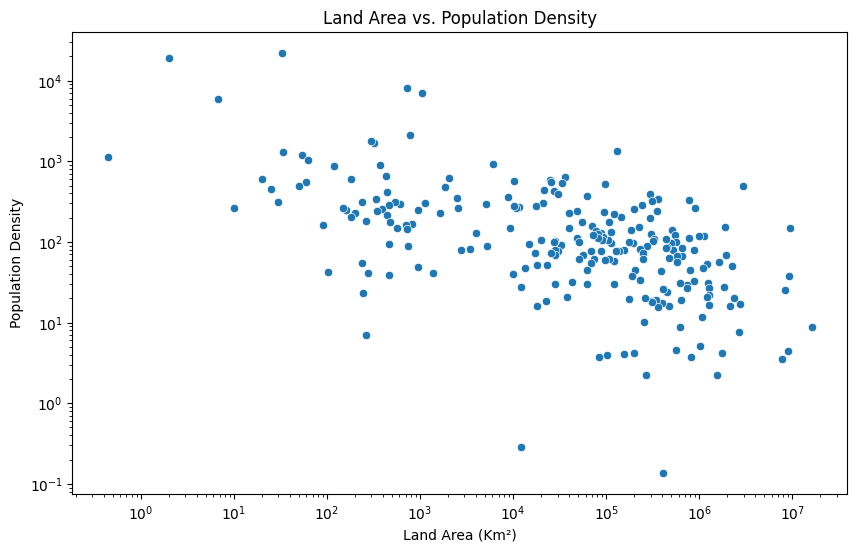

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='landAreaKm', y='density', data=df)
plt.title('Land Area vs. Population Density')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Population Density')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [20]:
from google.colab import files
df.to_excel('modified_population_data.xlsx', index=False)
files.download('modified_population_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>